# **FORDGO BIKE: RIDE ANALYSIS**

## Table of Content##

<ul>
<a href="#intro">1. Introduction</a></li>
<br><a href="#limitations">2. Limitations</a></li>
<br><a href="#datawrangling">3. Data Wrangling</a></li>    
<br><a href="#eda">4. Exploratory Data Analysis</a></li>
<br><a href="#conclusion">5. Main Findings</a></li>
<br><a href="#references">6. References</a></li>
<br></ul>

<a id='intro'></a>
# 1. Introduction##

**Bay Wheels**, known as **FordGo bikes** for a brief period, is a regional public bicycle sharing  system in California’s San Francisco Bay area. It was established in August 2013.

In September 2016, Ford announced its sponsorship with Bay wheels and on June 28, 2017, they renamed the system to Ford GoBike. In June 2019, after its acquisition by Lyft, the system was rebranded to Bay Wheels and they dropped the Ford naming.

As of January 2018, the Bay Wheels system had about **10,000 annual subscribers**, over **2,600 bicycles** in **262 stations** across San Francisco, East Bay and San Jose.

The data analyzed below is of February 2019. The source of the data is udacity.The dataset has 16 columns and 183,412 rows, which means approximately 183,000 rides were made during that month.

**The original columns of the data set are as follows:**
1. duration_sec: Duration for which bike was rented in seconds
2. start_time: Date and time on which the bike was rented
3. end_time: Date and time on which the bike was dropped
4. start_station_id: Station ID from where the bike was rented
5. start_station_name: Station name from where the bike was rented
6. start_station_latitude: Latitude of the station from where the bike was rented
7. start_station_longitude: Longitude of the station from where the bike was rented
8. end_station_id: Station ID where the bike was dropped
9. end_station_name: Station name where the bike was dropped
10. end_station_latitude: Latitude of the station where the bike was dropped
11. end_station_longitude: Longitude of the station where the bike was dropped
12. bike_id: ID of the bike rented
13. user_type: Customer or subscriber
14. member_birth_year: Birth year of the rider
15. member_gender: Gender of the rider
16. bike_share_for_all_trip: yes/no

**Questions analyzed are as follows:**


1. At what time of the week, the demand for the bike is at the peak? 
2. On an average for how much time the bike is rented every day of the week?
3. At what time of the day there are maximum number of riders? 
4. On an average for how much time the bike is rented every hour of the day?
5. How much percentage of the riders are subscribers and how much percentage of them are customers?
<br>*Note: riders can either be subscribers or they can rent it on adhoc basis known as customers*
6. Analyze relationship between age and duration of the bike rented for subscribers and customers 
7. How does the rental trend look like for different users?
8. For how long each user rent the bike every day?
9. Which are the most popular pick up stations?
10. Which are the most popular drop off stations?

<a id='limitations'></a>
## 2. Limitations##

The data analyzed is only for a month. Demand for bike is largely impacted by the weather mainly rain, heat and cold. Rain is the most adverse weather for riding bikes. Hence, it might be a good idea to have the weather data along with this.

In [2]:
!pip install folium

# importing the libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
import seaborn as sns
from datetime import datetime


<a id='datawrangling'></a>
# 3. Data Wrangling

In [3]:
#Loading the data and checking the first few rows

df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


In [4]:
# Checking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### 3.1.a Define
**Missing values**
- Drop null station values
- Replace missing values in member_birth_year with median

In [6]:
#Checking for nulls stations

df[(df.start_station_id.isnull())| (df.end_station_name.isnull())].index

Int64Index([   475,   1733,   3625,   4070,   5654,   6214,   8499,   8783,
             10967,  11071,
            ...
            155470, 161400, 161844, 172481, 174807, 176154, 179730, 179970,
            180106, 181201],
           dtype='int64', length=197)

In [7]:
# Checking for nulls in member_birth_year

len(df.member_birth_year.isnull())

183412

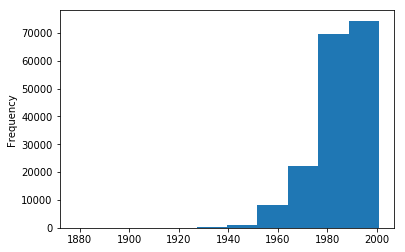

In [8]:
#Checking for distribution
df.member_birth_year.plot.hist()

### 3.1.b Code

In [9]:
#dropping the stations where station name is NULL

df.drop(df[(df.start_station_id.isnull())| (df.end_station_name.isnull())].index, inplace = True)

In [10]:
#Converting the member_birth_year column values to int inorder to replace  with median
df["member_birth_year"] = df[df.member_birth_year.notnull()]["member_birth_year"].astype(int)

median = df[df.member_birth_year.notnull()]["member_birth_year"].median()
median = median.astype(int)

# Replacing values
df.member_birth_year = df.member_birth_year.replace(np.nan, median)


### 3.1.b Test

In [11]:
# testing the data after dropping nulls

df[(df.start_station_id.isnull())| (df.end_station_name.isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null object
end_time                   183215 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          183215 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 23.8+ MB


**There are still null values in member_gender but they are not considered in analysis. Hence, we would leave it like that.**

### 3.2.a Define
- Change the data and time column from string to datetime
- Add duration in minutes column based on the duration in seconds column

### 3.2.b Code

In [13]:
# Changing the data and time column from string to datetime

df["start_time"] = df["start_time"].astype("datetime64")
df["end_time"] = df["end_time"].astype("datetime64")
df["duration_min"] = round(df.duration_sec/60, 2)

### 3.2.c Test

In [14]:
#Testing data
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          183215 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
duration_min               183215 non-null float64
dtypes: datetime6

### 3.3.a Define
- Find day of the week from the date

### 3.3.b Code 

In [15]:
# Finding the day of the week from the date

df["start_weekday"] = df.start_time.dt.weekday

# Data dictionary
weekday_dict = {0:"Monday", 1: "Tuesday", 2:"Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6 : "Sunday"}

#Getting weekday from no. of day in the week
df["start_weekday"] = df["start_weekday"].map(weekday_dict)


### 3.3.c Test

In [16]:
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          183215 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
duration_min               183215 non-null float64
start_weekday    

<a id='eda'></a>
# 4. Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed377faeb8>]], dtype=object)

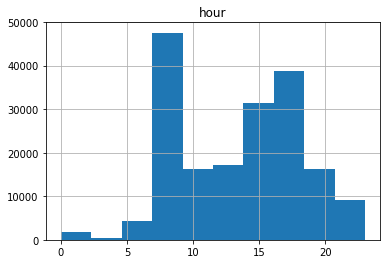

In [17]:
#Exploring the data

df["hour"] = df.start_time.dt.hour
df.hist("hour")


**The demand for the bike seems to be higher during peak hours**

In [18]:
# Adding ride counts. Each row item is a ride count

df["count"] = 1
df["count"].head()

0    1
1    1
2    1
3    1
4    1
Name: count, dtype: int64

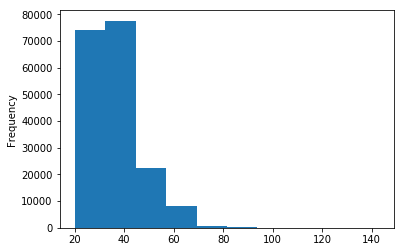

In [19]:
# Adding the age column for analysis
currentYear = datetime.now().year

df["age"] = currentYear - df["member_birth_year"]
df.age.plot.hist()

**It is very unlikely that for someone to be over 100 years and riding bike. So, let us replace all the values above 80 by mean**

In [20]:
meanbyage = df[df.age < 80]["age"].mean()
meanbyage

replacerowsage = df[df.age > 80].index.tolist()

In [21]:
for i in replacerowsage:
    df.at[i, "age"] = meanbyage

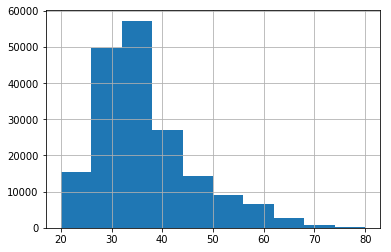

In [22]:
df.age.hist()

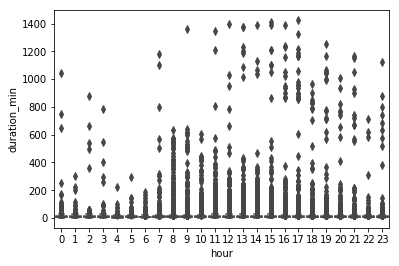

In [23]:
# checking for outliers

sns.boxplot(x = "hour", y = "duration_min",data = df )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed374c27b8>]], dtype=object)

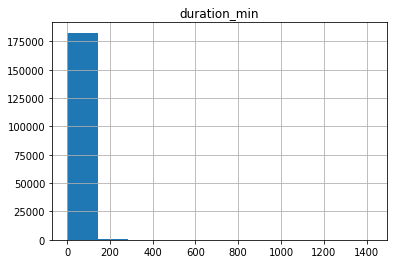

In [24]:
df.hist("duration_min")

In [25]:
df[df.duration_min > 200].shape[0]

375

**Based on the histogram above, it seems that there are very few riders (375) who would rent the bike for more than 200 minutes. Hence, it might be a good idea to replace the outliers with the mean of the rest of the data points so that we can get a better estimate of the duration for which the bike is rented.**

In [26]:
meanbyhour = df[df.duration_min < 200].groupby('hour').duration_min.mean()

mean = meanbyhour.mean()

replacerows = df[df.duration_min > 200].index.tolist()

In [27]:
for i in replacerows:
    df.at[i, "duration_min"] = mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed3741b2e8>]], dtype=object)

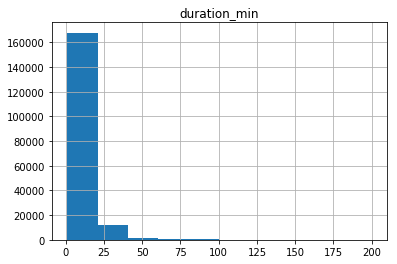

In [28]:
df.hist('duration_min')

### Univariate charts

## 1. At what time of the week, the demand for the bike is at the peak?

In [29]:
df["start_weekday"] = df.start_weekday.astype("category")
output = pd.Categorical(values = df.start_weekday, categories = ["Monday" ,"Tuesday","Wednesday", "Thursday","Friday", "Saturday", "Sunday"], ordered = True)
output

[Thursday, Thursday, Thursday, Thursday, Thursday, ..., Friday, Friday, Friday, Friday, Friday]
Length: 183215
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

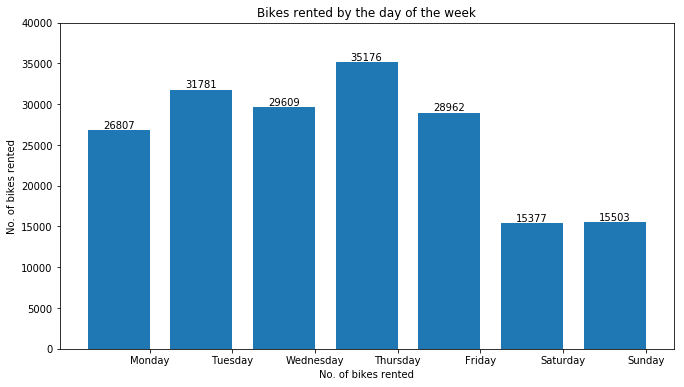

In [30]:
weekday_bar = df.groupby(by= 'start_weekday')["count"].count().reset_index()

weekday_bar['start_weekday']= weekday_bar['start_weekday'].astype(output)

weekday_bar = weekday_bar.sort_values('start_weekday').reset_index()

x = weekday_bar['start_weekday']
y = weekday_bar['count']
fig, ax = plt.subplots(figsize=(11,6))    
width = 0.75 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(x, minor=False)
plt.xlabel('No. of bikes rented')
plt.ylabel('No. of bikes rented')
plt.title('Bikes rented by the day of the week')
plt.ylim([0,40000])
for i in range(len(x)):
    plt.text(i,y[i], y[i], ha= "center", va = "bottom" )

**Observation 1: The demand for the bikes is highest on Thursday totalling to approximately 35,000 per month.**

## 2. On an average for how much time the bike is rented every day of the week?

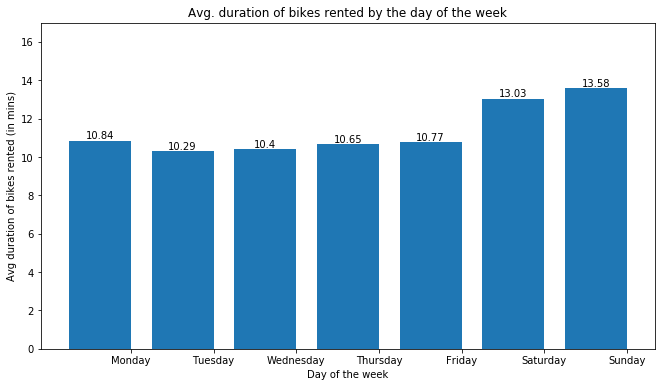

In [31]:
weekday_avgmin_df = df.groupby(by= 'start_weekday')["duration_min"].mean().reset_index()

weekday_avgmin_df.start_weekday = weekday_avgmin_df.start_weekday.astype(output)
weekday_avgmin_df = weekday_avgmin_df.sort_values('start_weekday').reset_index()
weekday_avgmin_df.duration_min = round(weekday_avgmin_df.duration_min,2)

x = weekday_avgmin_df['start_weekday']
y = weekday_avgmin_df['duration_min']
fig, ax = plt.subplots(figsize=(11,6))    
width = 0.75 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(x, minor=False)
plt.xlabel('Day of the week')
plt.ylabel('Avg duration of bikes rented (in mins)')
plt.title('Avg. duration of bikes rented by the day of the week')
plt.ylim([0,17])
for i in range(len(x)):
    plt.text(i,y[i], y[i], ha= "center", va = "bottom" )

**Observation 2: The bikes are rented for higher time in weekend as compared to weekdays. On an average, they are rented for 13 minutes on weekend as compared to 10 minutes on weekdays.**

## 3. At what time of the day there are maximum number of riders? 

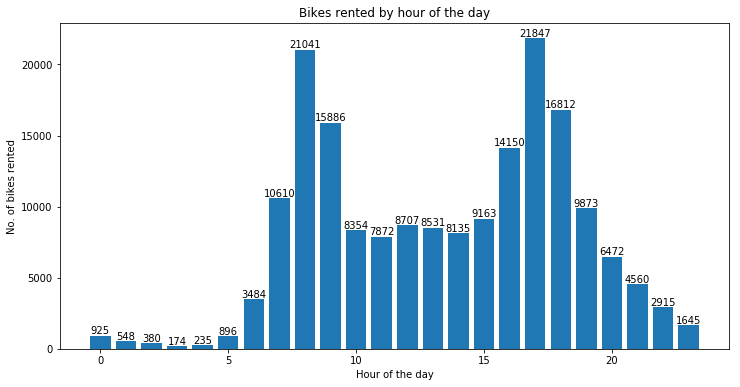

In [32]:
hour_df = df.groupby('hour').count()['count'].reset_index()

plt.figure(figsize= (12,6))
plt.bar(hour_df["hour"], hour_df["count"])
plt.xticks(rotation = 0)
plt.xlabel('Hour of the day')
plt.ylabel('No. of bikes rented')
plt.title('Bikes rented by hour of the day')
for i in range(len(hour_df["hour"])):
    plt.text(i,hour_df["count"][i], hour_df["count"][i], ha= "center", va = "bottom" )

**Observation 3: The demand for the bike is highest between 8 and 9 AM and between 5 and 6 PM. It seems that these bikes would be rented mainly for commuting purposes.** 

## 4. On an average for how much time the bike is rented every hour of the day?

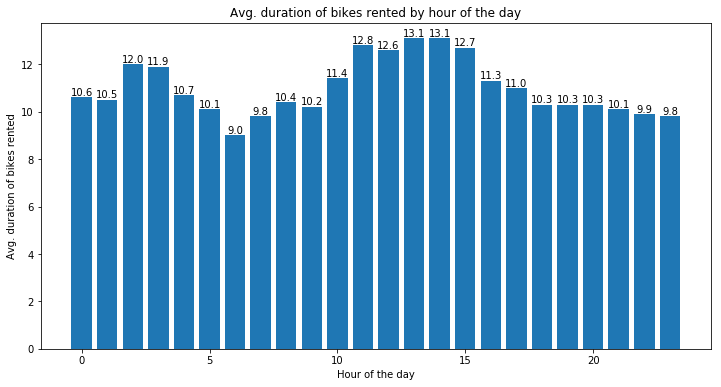

In [33]:
hour_avgmin_df = df.groupby('hour').mean()['duration_min'].reset_index()
hour_avgmin_df.duration_min = round(hour_avgmin_df.duration_min, 1)

plt.figure(figsize= (12,6))
plt.bar(hour_avgmin_df["hour"], hour_avgmin_df["duration_min"])
plt.xticks(rotation = 0)
plt.xlabel('Hour of the day')
plt.ylabel('Avg. duration of bikes rented')
plt.title('Avg. duration of bikes rented by hour of the day')
for i in range(len(hour_avgmin_df["hour"])):
    plt.text(i,hour_avgmin_df["duration_min"][i], hour_avgmin_df["duration_min"][i], ha= "center", va = "bottom" )


**Observation 4: The average duration of the bikes rented during the day is between 9 and 13 minutes approximately.**

### Bivariate charts

## 5. How much percentage of the riders are subscribers and how much percentage of them are customers? ## 
*Note: riders can either be subscribers or they can rent it on adhoc basis and they are defined as customers in this data set*

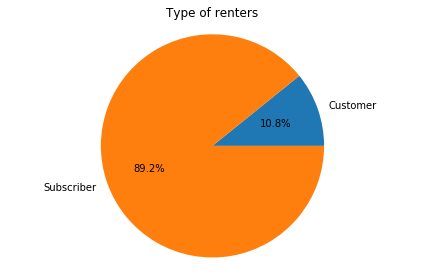

In [34]:
customer_df = df.groupby(by= 'user_type')["count"].count().reset_index()
plt.title('Type of renters')
plt.pie(customer_df["count"], labels = customer_df["user_type"], shadow= False, autopct= '%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Observation 5: Almost 89% of the renters are subscribers. It seems that they would be using bike regularly.**

## 6. Analyze relationship between age and duration of the bike rented for subscribers and customers

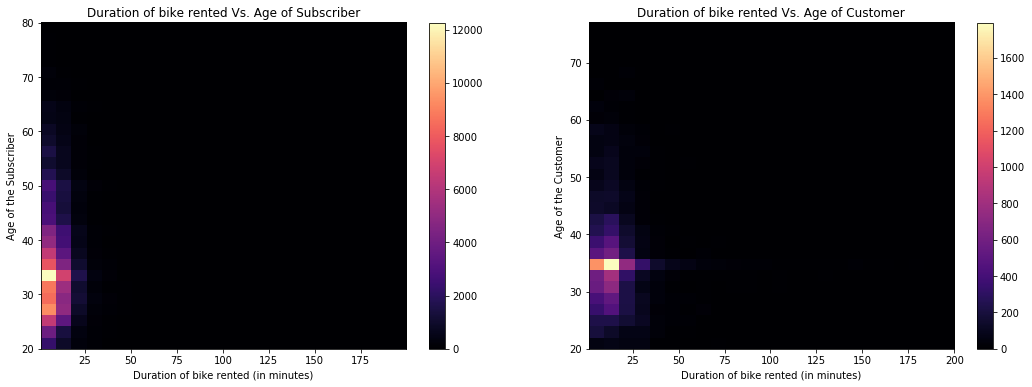

In [35]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
x = df[df.user_type == "Subscriber"]["duration_min"]
y = df[df.user_type == "Subscriber"]["age"]
x_min = x.min()
x_max = x.max()
  
y_min = y.min()
y_max = y.max()

x_bins = np.linspace(x_min, x_max, 25)
y_bins = np.linspace(y_min, y_max, 30)

plt.subplot(1, 2, 1)
#sns.regplot(data = df[df.user_type == "Subscriber"], x = "duration_min", y = "age", x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
#plt.hist2d(data = df[df.user_type == "Subscriber"], x = "duration_min", y = "age", alpha = 0.9)
plt.hist2d(x, y, bins =[x_bins, y_bins], cmap = "magma")
plt.xlabel('Duration of bike rented (in minutes)')
plt.ylabel('Age of the Subscriber')
plt.title("Duration of bike rented Vs. Age of Subscriber")
plt.colorbar();

# PLOT ON RIGHT

x = df[df.user_type == "Customer"]["duration_min"]
y = df[df.user_type == "Customer"]["age"]
x_min = x.min()
x_max = x.max()
  
y_min = y.min()
y_max = y.max()

x_bins = np.linspace(x_min, x_max, 25)
y_bins = np.linspace(y_min, y_max, 30)

plt.subplot(1, 2, 2)
#sns.regplot(data = df[df.user_type == "Subscriber"], x = "duration_min", y = "age", x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
#plt.hist2d(data = df[df.user_type == "Customer"], x = "duration_min", y = "age", alpha = 0.9)
plt.hist2d(x, y, bins =[x_bins, y_bins], cmap = "magma")
plt.xlabel('Duration of bike rented (in minutes)')
plt.ylabel('Age of the Customer')
plt.title("Duration of bike rented Vs. Age of Customer")
plt.colorbar();

**Observation 6: Customers and subscribers between the age group of 30 and 40 are the ones who rent most of the bikes. Subscribers in that age group ride for a shorter duration than customers. It seems that these age group of subscibers would renting bike for commuting purposes.**

### Multivariate charts

## 7. How does the rental trend look like for different users?

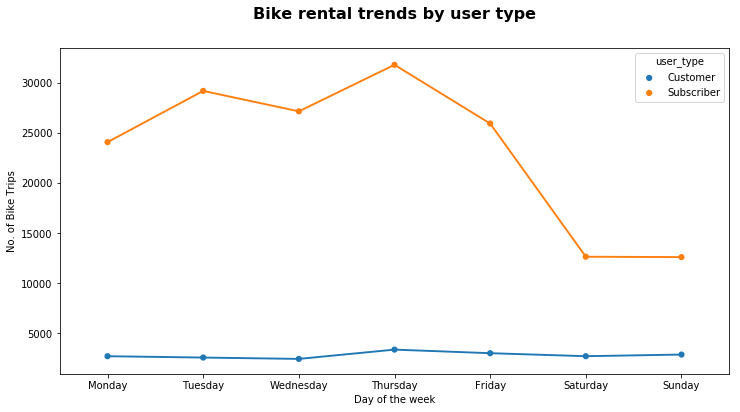

In [36]:
usertrend_df = df.groupby(['start_weekday', 'user_type']).count()["count"].reset_index()
usertrend_df.start_weekday  = usertrend_df.start_weekday.astype(output)
usertrend_df = usertrend_df.sort_values("start_weekday").reset_index()

plt.figure(figsize=(12, 6))
ax = sns.pointplot(data=usertrend_df, x = 'start_weekday', y='count', hue = 'user_type', scale=.7);
plt.title('Bike rental trends by user type', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('Day of the week')
plt.ylabel('No. of Bike Trips');

**Observation 7: Rental trend for the subscribers is high during the weekdays. It seems that they use the bikes mainly for the commuting purposes. The subscribers who use bike for leisure purposes seem to be less as compared to the suscribers who use it for commuting purposes.**
<br>**Rental trend for customers is almost the same during all the days of the week.**

## 8. For how long each user rent the bike every day?

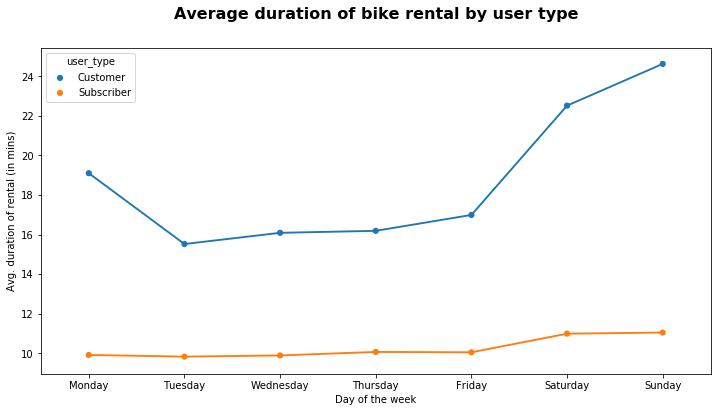

In [37]:
usertrendmin_df = df.groupby(['start_weekday', 'user_type']).mean()["duration_min"].reset_index()
usertrendmin_df.start_weekday  = usertrendmin_df.start_weekday.astype(output)
usertrendmin_df = usertrendmin_df.sort_values("start_weekday").reset_index()

plt.figure(figsize=(12, 6))
ax = sns.pointplot(data=usertrendmin_df, x = 'start_weekday', y='duration_min', hue = 'user_type', scale=.7);
plt.title('Average duration of bike rental by user type', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('Day of the week')
plt.ylabel('Avg. duration of rental (in mins)');

**Observation 8: Customers rent the bike for a longer duration than the subscribers. Subscribers would mainly be using their bikes for computing purposes**

## 9. Which are the most popular pick up stations? ##

In [38]:
startstationdf = df.groupby(["start_station_name", "start_station_latitude","start_station_longitude"]).count()["count"].reset_index()
startstationdf.sort_values('count', ascending = False).head()

# Popular pickup stations
sfo = folium.Map( location = [37.77, -122.41], zoom_start = 12.5)
for lat,long, startstation, count in zip (startstationdf["start_station_latitude"],startstationdf["start_station_longitude"], 
                                          startstationdf["start_station_name"],startstationdf["count"]):folium.CircleMarker([lat, long], 
                                        fill_color = "blue",fill_opacity= 0.5,line_color = "blue",radius = 0.0030 * count,
                                        popup = startstation + ": " + str(count) + " rides", tooltip =startstation + ": " + str(count) + " rides").add_to(sfo)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Popular pick-up stations</b></h3>
             '''
sfo.get_root().html.add_child(folium.Element(title_html))
sfo

**Observation 9: Market Street at 10th St., San Francisco caltrain station2, Berry Street at 4th Street are few of the most popular pick up stations in San Francisco, where the bikes picked up are more than 3000 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains,buses or freeways.**

## 10. Which are the most popular drop off stations?

In [39]:
endstationdf = df.groupby(["end_station_name", "end_station_latitude","end_station_longitude"]).count()["count"].reset_index()
endstationdf.sort_values('count', ascending = False).head()

sfoend = folium.Map( location = [37.77, -122.41], zoom_start = 12.5)
for lat,long, endstation, count in zip (endstationdf["end_station_latitude"],endstationdf["end_station_longitude"], 
                                          endstationdf["end_station_name"],endstationdf["count"]):folium.CircleMarker([lat, long], 
                                        fill_color = "blue",fill_opacity= 0.5,line_color = "blue",
                                        radius = 0.0030 * count,line_opacity = 0.5,alpha=0.5,
                                        popup = endstation + ": " + str(count) + " rides",
                                        tooltip = endstation + ": " + str(count) + " rides").add_to(sfoend)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Popular drop-off stations</b></h3>
             '''
sfoend.get_root().html.add_child(folium.Element(title_html))
sfoend

**Observation 10: San Francisco Caltrain station2, Market Street at 10th St., Montgomery Street BART Station are few of the most popular drop-off stations in San Francisco with drop off more than 3500 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains,buses or freeways.**


<a id='conclusion'></a>
# 5. Main Findings:

- The demand for the bikes is highest on Thursday totalling to approximately 35,000 rides per month.
- The bikes are rented for higher minutes in weekend as compared to weekdays. On an average, bikes are rented for 13 minutes on weekend as compared to 10 minutes on weekdays.
- The demand for the bike is highest between 8 and 9 AM and between 5 and 6 PM. It seems that these bikes would be rented mainly for commuting purposes. 
- The average duration of the bikes rented during day is between 9 and 13 minutes approximately. 
- Almost 89% of the renters are subscribers. It seems that they would be using bike regularly.
- Customers and subscribers between the age group of 30 and 40 are the ones who rent most of the bikes. Subscribers in that age group ride for a shorter duration than customers. It seems that these age group of subscibers would renting bike for commuting purposes.
- Rental trend for the subscribers is high during the weekdays. It seems that they use the bikes mainly for commuting purposes.The subscribers who use bike for leisure purposes seem to be less as compared to the subscribers who use it for commuting purposes.
<br> Rental trend for customers is almost the same during all the days of the week.
- Customers rent the bike for a longer duration than the subscribers. Subscribers would mainly be using their bikes for computing purposes
- Market Street at 10th St., San Francisco Caltrain station2, Berry Street at 4th Street are few of the most popular pick up stations in San Francisco, where the bikes picked up are more than 3000 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains, buses or freeways.
- San Francisco Caltrain station2, Market Street at 10th St., Montgomery Street BART Station are few of the most popular drop-off stations in San Francisco with drop off more than 3500 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains, buses or freeways.

In [40]:
from platform import python_version

print(python_version())

3.6.3


<a id='references'></a>
# 6. References:
- https://github.com/ciph3rwoman/Ford-GoBike-System-Data